## libraries import

### First I will import the libraries I need for data exploration and mapping:

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import osmnx as ox

import matplotlib.pyplot as plt

import numpy as np

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## data import

### Next I import the Street Trees dataset from Oakland, CA and the American Community Survey datasets: Table B19001 for household income, Table B03002 for race, and Table B15003 for educational attainment.

In [2]:
oakt=gpd.read_file('https://opendata.arcgis.com/datasets/385456a220174ef1854738b4029df3fd_0.geojson')

oakincome=gpd.read_file('HouseholdIncome.geojson')
oakrace=gpd.read_file('HispanicLatinoOriginByRace.geojson')
oakeduc=gpd.read_file('EducationalAttainment.geojson')

## data trimming

### Here I will perform some data exploration and cleaning. Trimming the Street Trees dataset and checking to see if it looks right

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

columns_trimmed = ['OBJECTID',
                       'LOCATION',
                       'SPECIES',
                       'DEAD',
                       'geometry']

oakt_trimmed = oakt[columns_trimmed]

In [4]:
oakt_trimmed.head()

OBJECTID   LOCATION               SPECIES DEAD                     geometry
0         1  171.00000        Pyrus kawakami    0  POINT (-122.20335 37.77072)
1         2  144.00000  Pyrus calleryana cvs    0  POINT (-122.20340 37.77066)
2         3   56.41644                 Shrub    0  POINT (-122.20014 37.76709)
3         4   44.00000              Malus sp    0  POINT (-122.20896 37.76671)
4         5  132.00000   Platanus acerifolia    0  POINT (-122.19416 37.77440)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## making lists, projecting to mercator, mapping tree data

### Now that my dataset is cleaned and ready to roll, I'm going to dive into making lists for our project. We are analyzing trees that release pollen with 'severe' allergenic affects, as well as dead trees. 

### I have already gone through our list of street trees and cross referenced them with websites and studies to find the most allergenic trees that exist on Oakland's streets.
### The dead trees are simply marked as such so I just picked them out of the list, not much to it


### After creating the lists I will reproject to Mercator and add basemaps 

In [5]:
list=['Acer negundo', 'Quercus agrifolia', 'Quercus palustris', 'Querus lobata', 'Querus rubra', 'Ligustrum japonicum', 'Ligustrum lucidum', 'Platanus acerifolia', 'Juglans h. californica']
list=oakt_trimmed.SPECIES.isin(list)
oakt_severe_allergy=oakt_trimmed[list]

oakt_severe_allergy["SPECIES"].replace({"Acer negundo": "Boxelder Maple",
                                        "Quercus agrifolia": "Coastal Live Oak",
                                        "Quercus palustris": "Pin Oak",
                                        "Querus lobata": "Valley Oak",
                                        "Querus rubra": "Norther Red Oak",
                                        "Ligustrum japonicum": "Japanese Privet",
                                        "Ligustrum lucidum": "Glossy Privet",
                                        "Platanus acerifolia": "London Plane",
                                        "Juglans h. californica": "California Black Walnut"}, inplace=True)
                                    
    
oakt_severe_allergy_mercator = oakt_severe_allergy.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
oakt_severe_allergy_mercator.sample(10)

OBJECTID   LOCATION       SPECIES DEAD  \
29343     29344  172.00000  London Plane    0   
30663     30664  145.74835  London Plane    0   
3392       3393  105.00000  London Plane    0   
24662     24663  189.00000  London Plane    0   
22966     22967  571.80624  London Plane    0   
13441     13442   39.00000  London Plane    0   
35867     35868  433.00000  London Plane    0   
20942     20943  220.30720  London Plane    0   
4125       4126  152.58711  London Plane    0   
2054       2055  210.51835  London Plane    0   

                                geometry  
29343  POINT (-13613221.250 4552650.308)  
30663  POINT (-13607128.636 4552547.318)  
3392   POINT (-13610478.148 4552786.978)  
24662  POINT (-13610433.171 4551442.716)  
22966  POINT (-13608776.931 4557316.167)  
13441  POINT (-13613027.706 4554512.593)  
35867  POINT (-13602176.581 4547560.799)  
20942  POINT (-13606564.356 4552671.277)  
4125   POINT (-13599948.291 4543320.980)  
2054   POINT (-13611335.805 4557678.200)

(-13615323.164469317,
 -13595067.113836663,
 4540103.9919828875,
 4560472.335687329)

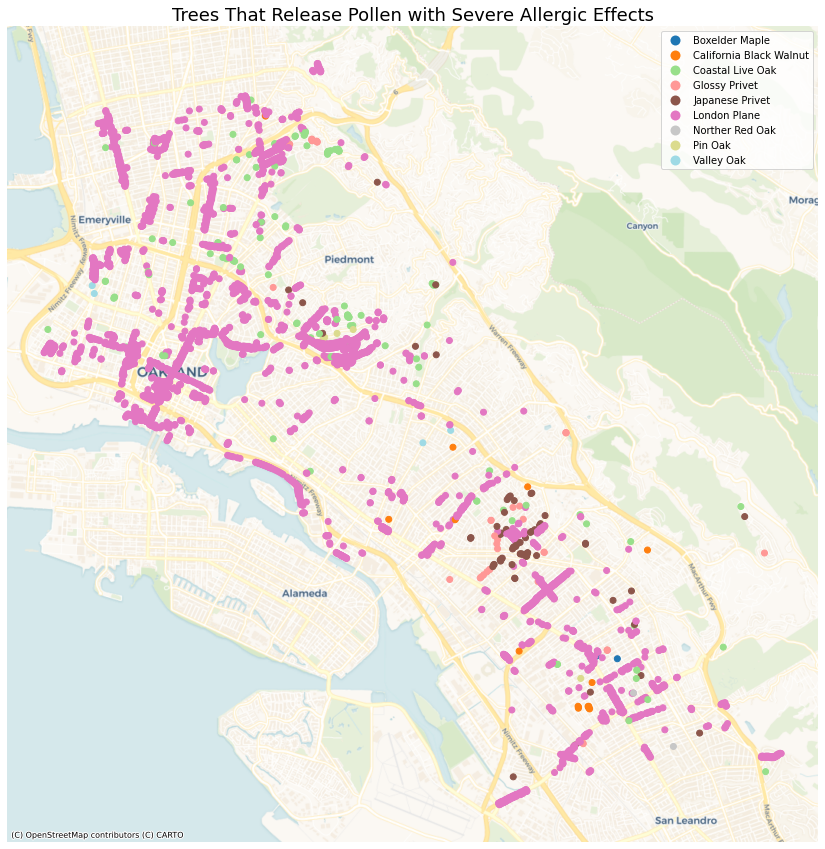

In [56]:
ax = oakt_severe_allergy_mercator.plot(column='SPECIES',cmap="tab20", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_severe_allergy_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Trees That Release Pollen with Severe Allergic Effects', fontsize=18)
ax.axis('off')

### It's interesting to see how clustered some of the trees are. The London Plane is obviously a popular tree (the leaves will sometimes stay attached to the tree throughout the winter months, making it an ideal shade provider year-round) and as such, it has been planted in clusters along city blocks as we can see on this map

In [7]:
list=['Dead']
list=oakt.SPECIES.isin(list)
oakt_dead_species=oakt_trimmed[list]

oakt_dead_species_mercator = oakt_dead_species.to_crs(epsg=3857)

In [42]:
oakt_dead_species_mercator.sample(10)

OBJECTID   LOCATION SPECIES DEAD                           geometry
13483     13484  291.00000    Dead   -1  POINT (-13611579.219 4554352.112)
18501     18502  258.72141    Dead   -1  POINT (-13612414.007 4557414.718)
38159     38160   98.00000    Dead   -1  POINT (-13606626.896 4548425.059)
6947       6948   31.24587    Dead   -1  POINT (-13608769.467 4558300.171)
22077     22078  398.00000    Dead   -1  POINT (-13603535.303 4549126.539)
24613     24614  562.00000    Dead   -1  POINT (-13610056.856 4554032.307)
26439     26440   46.66210    Dead   -1  POINT (-13602097.406 4547016.615)
1495       1496  148.48483    Dead   -1  POINT (-13608651.081 4557560.971)
16666     16667  909.00000    Dead   -1  POINT (-13604516.711 4549972.510)
38988     38989  152.00000    Dead   -1  POINT (-13609113.980 4555948.189)

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

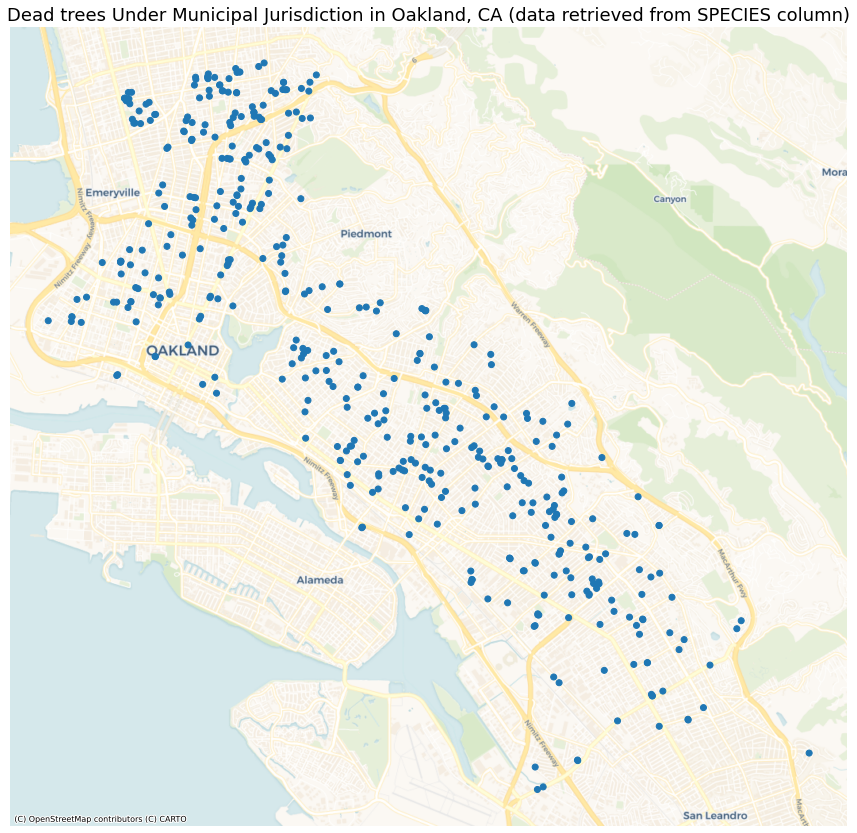

In [57]:
ax = oakt_dead_species_mercator.plot(column='SPECIES',cmap="tab20", figsize=(15, 15))
ctx.add_basemap(ax, crs=oakt_dead_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Dead trees Under Municipal Jurisdiction in Oakland, CA (data retrieved from SPECIES column)', fontsize=18)
ax.axis('off')

### Not as much of an obvious pattern with the dead trees but still interesting to see them mapped out like this

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## cleaning census data

### Time to look at the ACS data: I'm going to sort the columns and rename them, then convert the values to percentages

In [9]:
oakrace_columnstokeep=['geoid',
                       'name',
                       'B03002001',
                       'B03002002',
                       'B03002003',
                       'B03002004',
                       'B03002005',
                       'B03002006',
                       'B03002007',
                       'B03002008',
                       'B03002009',
                       'B03002012',
                       'geometry']
oakrace=oakrace[oakrace_columnstokeep]





oakrace=oakrace.drop([337])






oakrace.columns= ['geoid', 'name', 
                   'Total', 
                   'Not Hispanic or Latino', 
                   'White alone', 
                   'Black or African American alone', 
                   'American Indian and Alaska Native alone',
                   'Asian alone',
                   'Native Hawaiian and Other Pacific Islander alone',
                   'Some other race alone',
                   'Two or more races',
                   'Hispanic or Latino',
                   'geometry']


oakrace['Percent Non Hispanic'] = oakrace['Not Hispanic or Latino']/oakrace['Total']*100
oakrace['Percent White'] = oakrace['White alone']/oakrace['Total']*100
oakrace['Percent Black'] = oakrace['Black or African American alone']/oakrace['Total']*100
oakrace['Percent Native American'] = oakrace['American Indian and Alaska Native alone']/oakrace['Total']*100
oakrace['Percent Asian'] = oakrace['Asian alone']/oakrace['Total']*100
oakrace['Percent Hawaiian/PI'] = oakrace['Native Hawaiian and Other Pacific Islander alone']/oakrace['Total']*100
oakrace['Percent other race'] = oakrace['Some other race alone']/oakrace['Total']*100
oakrace['Percent two or more races'] = oakrace['Two or more races']/oakrace['Total']*100
oakrace['Percent Hispanic/Latino'] = oakrace['Hispanic or Latino']/oakrace['Total']*100

In [10]:
oakeduc['High school or less']=oakeduc['B15003002']+oakeduc['B15003003']+oakeduc['B15003004']+oakeduc['B15003005']+oakeduc['B15003006']+oakeduc['B15003007']+oakeduc['B15003008']+oakeduc['B15003009']+oakeduc['B15003010']+oakeduc['B15003011']+oakeduc['B15003012']+oakeduc['B15003013']+oakeduc['B15003014']+oakeduc['B15003015']+oakeduc['B15003016']+oakeduc['B15003017']
oakeduc['Some college']=oakeduc['B15003019']+oakeduc['B15003020']





oakeduccol=['geoid',
            'name',
            'B15003001',
            'B15003018',
            'B15003021',
            'B15003022',
            'B15003023',
            'B15003024',
            'B15003025',
            'geometry',
            'High school or less',
            'Some college']
oakeduc=oakeduc[oakeduccol]




oakeduc.columns=['geoid',
                 'name',
                 'Total',
                 'GED',
                 'Associates',
                 'Bachelor',
                 'Master',
                 'Professional school',
                 'Doctorate',
                 'geometry',
                 'High school or less',
                 'Some college']




oakeduc=oakeduc.drop([337])




oakeduc['Percent GED'] = oakeduc['GED']/oakeduc['Total']*100
oakeduc['Percent Associates'] = oakeduc['Associates']/oakeduc['Total']*100
oakeduc['Percent Bachelor'] = oakeduc['Bachelor']/oakeduc['Total']*100
oakeduc['Percent Master'] = oakeduc['Master']/oakeduc['Total']*100
oakeduc['Percent Professional school'] = oakeduc['Professional school']/oakeduc['Total']*100
oakeduc['Percent Doctorate'] = oakeduc['Doctorate']/oakeduc['Total']*100
oakeduc['Percent High school or less'] = oakeduc['High school or less']/oakeduc['Total']*100
oakeduc['Percent Some college'] = oakeduc['Some college']/oakeduc['Total']*100



#oakeduc['Percent Higher Ed']=oakeduc['Percent Bachelor']+oakeduc['Percent Master']+oakeduc['Percent Doctorate']

In [11]:
oakincome_columnstokeep=['geoid',
                       'name',
                       'B19001001',
                       'B19001002',
                       'B19001003',
                       'B19001004',
                       'B19001005',
                       'B19001006',
                       'B19001007',
                       'B19001008',
                       'B19001009',
                       'B19001010',
                         'B19001011',
                         'B19001012',
                         'B19001013',
                         'B19001014',
                         'B19001015',
                         'B19001016',
                         'B19001017',
                       'geometry']
oakincome=oakincome[oakincome_columnstokeep]



oakincome.columns = ['geoid',
                     'name',
                     'Total',
                     'Less than $10,000',
                   '$10,000 to $14,999',
                   '$15,000 to $19,999',
                   '$20,000 to $24,999',
                    '$25,000 to $29,999',
                    '$30,000 to $34,999',
                    '$35,000 to $39,999',
                    '$40,000 to $44,999',
                    '$45,000 to $49,999',
                    '$50,000 to $59,999',
                    '$60,000 to $74,999',
                    '$75,000 to $99,999',
                    '$100,000 to $124,999',
                    '$125,000 to $149,999',
                    '$150,000 to $199,999',
                    '$200,000 or more',
                    'geometry']

oakincome=oakincome.drop([337])


oakincome['Percent Less than $10,000'] = oakincome['Less than $10,000']/oakincome['Total']*100
oakincome['Percent $10,000 to $14,999'] = oakincome['$10,000 to $14,999']/oakincome['Total']*100
oakincome['Percent $20,000 to $24,999'] = oakincome['$20,000 to $24,999']/oakincome['Total']*100
oakincome['Percent $30,000 to $34,999'] = oakincome['$30,000 to $34,999']/oakincome['Total']*100
oakincome['Percent $35,000 to $39,999'] = oakincome['$35,000 to $39,999']/oakincome['Total']*100
oakincome['Percent $40,000 to $44,999'] = oakincome['$40,000 to $44,999']/oakincome['Total']*100
oakincome['Percent $45,000 to $49,999'] = oakincome['$45,000 to $49,999']/oakincome['Total']*100
oakincome['Percent $50,000 to $59,999'] = oakincome['$50,000 to $59,999']/oakincome['Total']*100
oakincome['Percent $60,000 to $74,999'] = oakincome['$60,000 to $74,999']/oakincome['Total']*100
oakincome['Percent $75,000 to $99,999'] = oakincome['$75,000 to $99,999']/oakincome['Total']*100
oakincome['Percent $100,000 to $124,999'] = oakincome['$100,000 to $124,999']/oakincome['Total']*100
oakincome['Percent $125,000 to $149,999'] = oakincome['$125,000 to $149,999']/oakincome['Total']*100
oakincome['Percent $150,000 to $199,999'] = oakincome['$150,000 to $199,999']/oakincome['Total']*100
oakincome['Percent $200,000 or more'] = oakincome['$200,000 or more']/oakincome['Total']*100


#oakincome['Percent Low Income']=oakincome['Percent Less than $10,000']+oakincome['Percent $10,000 to $14,999']+oakincome['Percent $20,000 to $24,999']+oakincome['Percent $30,000 to $34,999']+oakincome['Percent $35,000 to $39,999']+oakincome['Percent $40,000 to $44,999']+oakincome['Percent $45,000 to $49,999']
#oakincome['Percent Medium Income']=oakincome['Percent $50,000 to $59,999']+oakincome['Percent $60,000 to $74,999']+oakincome['Percent $75,000 to $99,999']
#oakincome['Percent High Income']=oakincome['Percent $100,000 to $124,999']+oakincome['Percent $125,000 to $149,999']+oakincome['Percent $150,000 to $199,999']
#oakincome['Percent Highest Earning']=oakincome['Percent $200,000 or more']


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## reprojecting census data

### Here I've reprojected the ACS datasets to Mercator for mapping purposes. This is maybe uneccessary considering I reproject again after merging datasets down below...

In [12]:
oakrace_mercator = oakrace.to_crs(epsg=3857)
oakincome_mercator = oakincome.to_crs(epsg=3857)
oakeduc_mercator = oakeduc.to_crs(epsg=3857)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## merging census + tree data

### Next I will merge my datasets, reset my indicies, and map the merged datasets

In [13]:
race_oakt_allergy=gpd.sjoin(oakrace,oakt_severe_allergy)
income_oakt_allergy=gpd.sjoin(oakincome,oakt_severe_allergy)
educ_oakt_allergy=gpd.sjoin(oakincome,oakt_severe_allergy)


In [14]:
race_oakt_dead=gpd.sjoin(oakrace,oakt_dead_species)
income_oakt_dead=gpd.sjoin(oakincome,oakt_dead_species)
educ_oakt_dead=gpd.sjoin(oakincome,oakt_dead_species)


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## reseting indices

In [15]:
race_dead_tree_counts = race_oakt_dead.value_counts('geoid').reset_index(name='tree count')

income_dead_tree_counts = income_oakt_dead.value_counts('geoid').reset_index(name='tree count')

educ_dead_tree_counts = educ_oakt_dead.value_counts('geoid').reset_index(name='tree count')


In [16]:
race_allergy_tree_counts = race_oakt_allergy.value_counts('geoid').reset_index(name='tree count')

educ_allergy_tree_counts = educ_oakt_allergy.value_counts('geoid').reset_index(name='tree count')

income_allergy_tree_counts = income_oakt_allergy.value_counts('geoid').reset_index(name='tree count')                                                        
                                                              

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 

In [18]:
oakt_race_deadtree = oakrace.merge(race_dead_tree_counts, how='left', on='geoid')

oakt_income_deadtree = oakincome.merge(income_dead_tree_counts, how='left', on='geoid')

oakt_educ_deadtree = oakeduc.merge(educ_dead_tree_counts, how='left', on='geoid')

In [19]:
oakt_race_allergytree = oakrace.merge(race_allergy_tree_counts, how='left', on='geoid')

oakt_income_allergytree = oakincome.merge(income_allergy_tree_counts,how='left', on='geoid')

oakt_educ_allergytree = oakeduc.merge(educ_allergy_tree_counts,how='left', on='geoid')

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [44]:
oakt_race_deadtree.sample(10)

geoid                        name   Total  \
85   15000US060014037021  Block Group 1, Alameda, CA   541.0   
64   15000US060014028002  Block Group 2, Alameda, CA  2914.0   
159  15000US060014058003  Block Group 3, Alameda, CA  1348.0   
13   15000US060014006001  Block Group 1, Alameda, CA  1085.0   
187  15000US060014065002  Block Group 2, Alameda, CA   932.0   
330  15000US060014104002  Block Group 2, Alameda, CA  1400.0   
289  15000US060014091002  Block Group 2, Alameda, CA  1105.0   
220  15000US060014072002  Block Group 2, Alameda, CA  1704.0   
331  15000US060014104003  Block Group 3, Alameda, CA  1787.0   
30   15000US060014011001  Block Group 1, Alameda, CA   446.0   

     Not Hispanic or Latino  White alone  Black or African American alone  \
85                    430.0        198.0                            159.0   
64                   2761.0        932.0                            953.0   
159                  1121.0        196.0                            450.0   
13                   1002.0        444.0                            248.0   
187                   455.0        101.0                            124.0   
330                   840.0         34.0                            696.0   
289                   514.0         26.0                            332.0   
220                   687.0        229.0                            261.0   
331                   967.0        230.0                            401.0   
30                    433.0        229.0                             91.0   

     American Indian and Alaska Native alone  Asian alone  \
85                                       0.0         73.0   
64                                      10.0        600.0   
159                                      0.0        397.0   
13                                       3.0        118.0   
187                                      0.0        149.0   
330                                      3.0         97.0   
289                                      0.0         72.0   
220                                     15.0        182.0   
331                                      0.0        286.0   
30                                       0.0         93.0   

     Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
85                                                0.0                    0.0   
64                                                0.0                    0.0   
159                                              25.0                    0.0   
13                                               15.0                   28.0   
187                                              81.0                    0.0   
330                                               0.0                    0.0   
289                                               0.0                    0.0   
220                                               0.0                    0.0   
331                                               0.0                    0.0   
30                                               12.0                    0.0   

     Two or more races  Hispanic or Latino  \
85                 0.0               111.0   
64               266.0               153.0   
159               53.0               227.0   
13               146.0                83.0   
187                0.0               477.0   
330               10.0               560.0   
289               84.0               591.0   
220                0.0              1017.0   
331               50.0               820.0   
30                 8.0                13.0   

                                              geometry  Percent Non Hispanic  \
85   MULTIPOLYGON (((-122.25256 37.81058, -122.2514...             79.482440   
64   MULTIPOLYGON (((-122.27351 37.81151, -122.2731...             94.749485   
159  MULTIPOLYGON (((-122.23795 37.79495, -122.2376...             83.160237   
13   MULTIPOLYGON (((-122.26807 37.84414, -122.2678...             92.350230   
187  M

In [45]:
oakt_income_deadtree.sample(10)

geoid                        name   Total  \
236  15000US060014077001  Block Group 1, Alameda, CA   506.0   
318  15000US060014100001  Block Group 1, Alameda, CA   415.0   
255  15000US060014083001  Block Group 1, Alameda, CA   300.0   
323  15000US060014102001  Block Group 1, Alameda, CA   423.0   
10   15000US060014005001  Block Group 1, Alameda, CA  1110.0   
222  15000US060014072004  Block Group 4, Alameda, CA   568.0   
288  15000US060014091001  Block Group 1, Alameda, CA   416.0   
186  15000US060014065001  Block Group 1, Alameda, CA   730.0   
121  15000US060014048002  Block Group 2, Alameda, CA   696.0   
147  15000US060014055001  Block Group 1, Alameda, CA   280.0   

     Less than $10,000  $10,000 to $14,999  $15,000 to $19,999  \
236               29.0                16.0                10.0   
318               13.0                11.0                 0.0   
255                6.0                72.0                10.0   
323                0.0                52.0                 0.0   
10                54.0                20.0                24.0   
222               31.0                 0.0                27.0   
288               22.0                13.0                35.0   
186               54.0                20.0                49.0   
121               38.0                17.0                 9.0   
147                0.0                61.0                 0.0   

     $20,000 to $24,999  $25,000 to $29,999  $30,000 to $34,999  \
236                12.0                28.0                29.0   
318                 0.0                 0.0                 0.0   
255                 0.0                 6.0                 0.0   
323                42.0                76.0                 0.0   
10                 27.0                70.0                54.0   
222                45.0                59.0                38.0   
288                12.0                15.0                34.0   
186                38.0                 0.0                57.0   
121                 0.0                 0.0                84.0   
147                25.0                 0.0                18.0   

     $35,000 to $39,999  $40,000 to $44,999  $45,000 to $49,999  \
236                10.0                20.0                32.0   
318                 0.0                12.0                11.0   
255                 0.0                26.0                 0.0   
323                17.0                56.0                 7.0   
10                  6.0                36.0                59.0   
222                52.0                37.0                 0.0   
288                31.0                14.0                24.0   
186                43.0                29.0                36.0   
121                 0.0                13.0                 0.0   
147                 8.0                 0.0                 0.0   

     $50,000 to $59,999  $60,000 to $74,999  $75,000 to $99,999  \
236                36.0                24.0               110.0   
318                20.0                39.0                35.0   
255                 8.0                13.0                85.0   
323                39.0                28.0                88.0   
10                 18.0                21.0               102.0   
222                86.0                46.0                54.0   
288                 9.0                55.0                71.0   
186                18.0                82.0               116.0   
121                71.0                88.0                56.0   
147                42.0                13.0                 0.0   

     $100,000 to $124,999  $125,000 to $149,999  $150,000 to $199,999  \
236                  45.0                  28.0                  56.0   
318                  50.0                 112.0                  49.0   
255                  36.0                   7.0                  21.0   
323                   3.0                   0.0                  15.0   
10      

In [46]:
oakt_educ_deadtree.sample(10)

geoid                        name   Total   GED  \
192  15000US060014066013  Block Group 3, Alameda, CA  1156.0   8.0   
290  15000US060014092001  Block Group 1, Alameda, CA  1319.0  18.0   
321  15000US060014101001  Block Group 1, Alameda, CA   873.0   0.0   
123  15000US060014049002  Block Group 2, Alameda, CA  1045.0   8.0   
224  15000US060014073002  Block Group 2, Alameda, CA   818.0  19.0   
210  15000US060014070003  Block Group 3, Alameda, CA   499.0  17.0   
277  15000US060014087006  Block Group 6, Alameda, CA   873.0  23.0   
299  15000US060014095001  Block Group 1, Alameda, CA   914.0  14.0   
146  15000US060014054022  Block Group 2, Alameda, CA   957.0   3.0   
89   15000US060014038003  Block Group 3, Alameda, CA   616.0   0.0   

     Associates  Bachelor  Master  Professional school  Doctorate  \
192        61.0     240.0    91.0                 43.0       18.0   
290        61.0     109.0    13.0                 21.0        0.0   
321       111.0     158.0    58.0                  6.0       16.0   
123       137.0     199.0   162.0                 54.0       27.0   
224        33.0     154.0    60.0                  0.0        3.0   
210        20.0     138.0    89.0                  0.0        0.0   
277        72.0      53.0    51.0                  0.0        0.0   
299        64.0      41.0    19.0                  7.0        0.0   
146        60.0     199.0    51.0                  3.0       37.0   
89         18.0     252.0   117.0                  0.0       25.0   

                                              geometry  High school or less  \
192  MULTIPOLYGON (((-122.21243 37.79485, -122.2121...                487.0   
290  MULTIPOLYGON (((-122.18023 37.72574, -122.1802...                837.0   
321  MULTIPOLYGON (((-122.16034 37.75293, -122.1601...                257.0   
123  MULTIPOLYGON (((-122.22284 37.80049, -122.2228...                157.0   
224  MULTIPOLYGON (((-122.22490 37.76456, -122.2245...                385.0   
210  MULTIPOLYGON (((-122.20744 37.78537, -122.2072...                127.0   
277  MULTIPOLYGON (((-122.19219 37.77029, -122.1914...                441.0   
299  MULTIPOLYGON (((-122.19361 37.74833, -122.1935...                581.0   
146  MULTIPOLYGON (((-122.24682 37.79548, -122.2466...                430.0   
89   MULTIPOLYGON (((-122.24855 37.81059, -122.2482...                125.0   

     Some college  Percent GED  Percent Associates  Percent Bachelor  \
192         208.0     0.692042            5.276817         20.761246   
290         260.0     1.364670            4.624716          8.263836   
321         267.0     0.000000           12.714777         18.098511   
123         301.0     0.765550           13.110048         19.043062   
224         164.0     2.322738            4.034230         18.826406   
210         108.0     3.406814            4.008016         27.655311   
277         233.0     2.634593            8.247423          6.071019   
299         188.0     1.531729            7.002188          4.485777   
146         174.0     0.313480            6.269592         20.794148   
89           79.0     0.000000            2.922078         40.909091   

     Percent Master  Percent Professional school  Percent Doctorate  \
192        7.871972                     3.719723           1.557093   
290        0.985595                     1.592115           0.000000   
321        6.643757                     0.687285           1.832761   
123       15.502392                     5.167464           2.583732   
224        7.334963                     0.000000           0.366748   
210       17.835671                     0.000000           0.000000   
277        5.841924                     0.000000           0.000000   
299        2.078775                     0.765864           0.000000   
146        5.329154                     0.313480           3.866249   
89        18.993506                     0.000000           4.058442   

     Percent High school or less  Percent S

In [47]:
oakt_race_allergytree.sample(10)

geoid                        name   Total  \
61   15000US060014027001  Block Group 1, Alameda, CA   797.0   
194  15000US060014066021  Block Group 1, Alameda, CA  1110.0   
54   15000US060014022002  Block Group 2, Alameda, CA   929.0   
330  15000US060014104002  Block Group 2, Alameda, CA  1400.0   
177  15000US060014062021  Block Group 1, Alameda, CA   825.0   
28   15000US060014010005  Block Group 5, Alameda, CA  1165.0   
234  15000US060014076004  Block Group 4, Alameda, CA  1301.0   
20   15000US060014008002  Block Group 2, Alameda, CA  1131.0   
206  15000US060014069002  Block Group 2, Alameda, CA  1360.0   
143  15000US060014054012  Block Group 2, Alameda, CA  1054.0   

     Not Hispanic or Latino  White alone  Black or African American alone  \
61                    641.0        154.0                            282.0   
194                   812.0        191.0                            164.0   
54                    832.0        133.0                            462.0   
330                   840.0         34.0                            696.0   
177                   344.0         65.0                            211.0   
28                    864.0        421.0                            356.0   
234                   593.0        151.0                            285.0   
20                    937.0        366.0                            436.0   
206                  1206.0        840.0                             85.0   
143                   793.0        132.0                            360.0   

     American Indian and Alaska Native alone  Asian alone  \
61                                      12.0        175.0   
194                                      5.0        398.0   
54                                       0.0        203.0   
330                                      3.0         97.0   
177                                     13.0         49.0   
28                                       0.0         54.0   
234                                      0.0        111.0   
20                                       0.0         79.0   
206                                     15.0        180.0   
143                                      0.0        212.0   

     Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
61                                                0.0                    0.0   
194                                               5.0                    0.0   
54                                                0.0                    0.0   
330                                               0.0                    0.0   
177                                               0.0                    0.0   
28                                                0.0                    0.0   
234                                               0.0                    0.0   
20                                                0.0                    0.0   
206                                               0.0                    0.0   
143                                               0.0                   36.0   

     Two or more races  Hispanic or Latino  \
61                18.0               156.0   
194               49.0               298.0   
54                34.0                97.0   
330               10.0               560.0   
177                6.0               481.0   
28                33.0               301.0   
234               46.0               708.0   
20                56.0               194.0   
206               86.0               154.0   
143               53.0               261.0   

                                              geometry  Percent Non Hispanic  \
61   MULTIPOLYGON (((-122.27859 37.80741, -122.2784...             80.426600   
194  MULTIPOLYGON (((-122.21790 37.79590, -122.2178...             73.153153   
54   MULTIPOLYGON (((-122.29826 37.80609, -122.2975...             89.558665   
330  MULTIPOLYGON (((-122.16273 37.74065, -122.1625...             60.000000   
177  M

In [48]:
oakt_income_allergytree.sample(10)

geoid                        name   Total  \
163  15000US060014059013  Block Group 3, Alameda, CA   240.0   
39   15000US060014013003  Block Group 3, Alameda, CA   639.0   
313  15000US060014098003  Block Group 3, Alameda, CA   226.0   
225  15000US060014074001  Block Group 1, Alameda, CA   507.0   
295  15000US060014093004  Block Group 4, Alameda, CA   199.0   
50   15000US060014017003  Block Group 3, Alameda, CA     0.0   
278  15000US060014088001  Block Group 1, Alameda, CA   386.0   
76   15000US060014035012  Block Group 2, Alameda, CA  1036.0   
91   15000US060014039001  Block Group 1, Alameda, CA   895.0   
98   15000US060014041021  Block Group 1, Alameda, CA  1010.0   

     Less than $10,000  $10,000 to $14,999  $15,000 to $19,999  \
163               40.0                 0.0                 0.0   
39                35.0                 0.0                10.0   
313               26.0                12.0                 0.0   
225               80.0                19.0                13.0   
295               48.0                 0.0                 0.0   
50                 0.0                 0.0                 0.0   
278               35.0                29.0                11.0   
76                47.0                15.0                52.0   
91                 0.0                28.0                14.0   
98                38.0                65.0                63.0   

     $20,000 to $24,999  $25,000 to $29,999  $30,000 to $34,999  \
163                25.0                 1.0                11.0   
39                  9.0                50.0                24.0   
313                 9.0                51.0                 0.0   
225                31.0                30.0                 0.0   
295                 0.0                 0.0                 0.0   
50                  0.0                 0.0                 0.0   
278                12.0                28.0                 0.0   
76                 68.0                17.0                21.0   
91                 16.0                79.0                 9.0   
98                 62.0                40.0                36.0   

     $35,000 to $39,999  $40,000 to $44,999  $45,000 to $49,999  \
163                12.0                25.0                 5.0   
39                 19.0                13.0                18.0   
313                 0.0                 0.0                 0.0   
225                 0.0                 0.0                 7.0   
295                50.0                 0.0                 0.0   
50                  0.0                 0.0                 0.0   
278                55.0                 0.0                 0.0   
76                 64.0                10.0                60.0   
91                 47.0                 0.0                67.0   
98                  0.0                 0.0                29.0   

     $50,000 to $59,999  $60,000 to $74,999  $75,000 to $99,999  \
163                13.0                24.0                11.0   
39                 25.0                57.0                88.0   
313                25.0                11.0                13.0   
225                41.0                49.0               132.0   
295                36.0                14.0                 0.0   
50                  0.0                 0.0                 0.0   
278                59.0                42.0                63.0   
76                124.0                85.0                87.0   
91                  7.0                57.0               214.0   
98                 63.0                80.0               102.0   

     $100,000 to $124,999  $125,000 to $149,999  $150,000 to $199,999  \
163                  15.0                  30.0                   0.0   
39                   68.0                  27.0                  68.0   
313                  24.0                  30.0                   7.0   
225                  44.0                  35.0                  18.0   
295     

In [49]:
oakt_educ_allergytree.sample(10)

geoid                        name   Total   GED  \
73   15000US060014034003  Block Group 3, Alameda, CA  1036.0  11.0   
184  15000US060014064001  Block Group 1, Alameda, CA   427.0   0.0   
165  15000US060014059022  Block Group 2, Alameda, CA  1015.0  20.0   
147  15000US060014055001  Block Group 1, Alameda, CA   792.0  19.0   
320  15000US060014100003  Block Group 3, Alameda, CA     0.0   0.0   
188  15000US060014065003  Block Group 3, Alameda, CA   985.0  43.0   
46   15000US060014016001  Block Group 1, Alameda, CA  1037.0   0.0   
260  15000US060014084001  Block Group 1, Alameda, CA   757.0  33.0   
288  15000US060014091001  Block Group 1, Alameda, CA   938.0  21.0   
9    15000US060014004003  Block Group 3, Alameda, CA  1021.0  28.0   

     Associates  Bachelor  Master  Professional school  Doctorate  \
73         11.0     343.0   245.0                136.0       16.0   
184        44.0      62.0    89.0                 49.0        8.0   
165        59.0     164.0    41.0                  6.0        0.0   
147       106.0     210.0    45.0                 13.0        0.0   
320         0.0       0.0     0.0                  0.0        0.0   
188        31.0     100.0    67.0                  0.0        0.0   
46        123.0     279.0   148.0                  8.0        0.0   
260        16.0      67.0    82.0                  0.0        0.0   
288        52.0      39.0    11.0                  0.0        0.0   
9          13.0     278.0   243.0                 81.0      117.0   

                                              geometry  High school or less  \
73   MULTIPOLYGON (((-122.26396 37.80174, -122.2638...                223.0   
184  MULTIPOLYGON (((-122.22156 37.79098, -122.2214...                 73.0   
165  MULTIPOLYGON (((-122.24717 37.78991, -122.2463...                553.0   
147  MULTIPOLYGON (((-122.24335 37.79529, -122.2431...                270.0   
320  MULTIPOLYGON (((-122.15170 37.75191, -122.1516...                  0.0   
188  MULTIPOLYGON (((-122.22263 37.78399, -122.2223...                608.0   
46   MULTIPOLYGON (((-122.28842 37.81842, -122.2874...                278.0   
260  MULTIPOLYGON (((-122.17705 37.76598, -122.1768...                332.0   
288  MULTIPOLYGON (((-122.18878 37.73173, -122.1886...                624.0   
9    MULTIPOLYGON (((-122.26099 37.84738, -122.2609...                136.0   

     Some college  Percent GED  Percent Associates  Percent Bachelor  \
73           51.0     1.061776            1.061776         33.108108   
184         102.0     0.000000           10.304450         14.519906   
165         172.0     1.970443            5.812808         16.157635   
147         129.0     2.398990           13.383838         26.515152   
320           0.0          NaN                 NaN               NaN   
188         136.0     4.365482            3.147208         10.152284   
46          201.0     0.000000           11.861138         26.904532   
260         227.0     4.359313            2.113606          8.850727   
288         191.0     2.238806            5.543710          4.157783   
9           125.0     2.742409            1.273262         27.228208   

     Percent Master  Percent Professional school  Percent Doctorate  \
73        23.648649                    13.127413           1.544402   
184       20.843091                    11.475410           1.873536   
165        4.039409                     0.591133           0.000000   
147        5.681818                     1.641414           0.000000   
320             NaN                          NaN                NaN   
188        6.802030                     0.000000           0.000000   
46        14.271938                     0.771456           0.000000   
260       10.832232                     0.000000           0.000000   
288        1.172708                     0.000000           0.000000   
9         23.800196                     7.933399          11.459354   

     Percent High school or less  Percent S

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## mapping merged data

### So like I said above, here I will reproject to mercator and then add the basemaps. 

In [20]:
oakt_educ_allergytree_mercator = oakt_educ_allergytree.to_crs(epsg=3857)
oakt_income_allergytree_mercator = oakt_income_allergytree.to_crs(epsg=3857)
oakt_race_allergytree_mercator = oakt_race_allergytree.to_crs(epsg=3857)

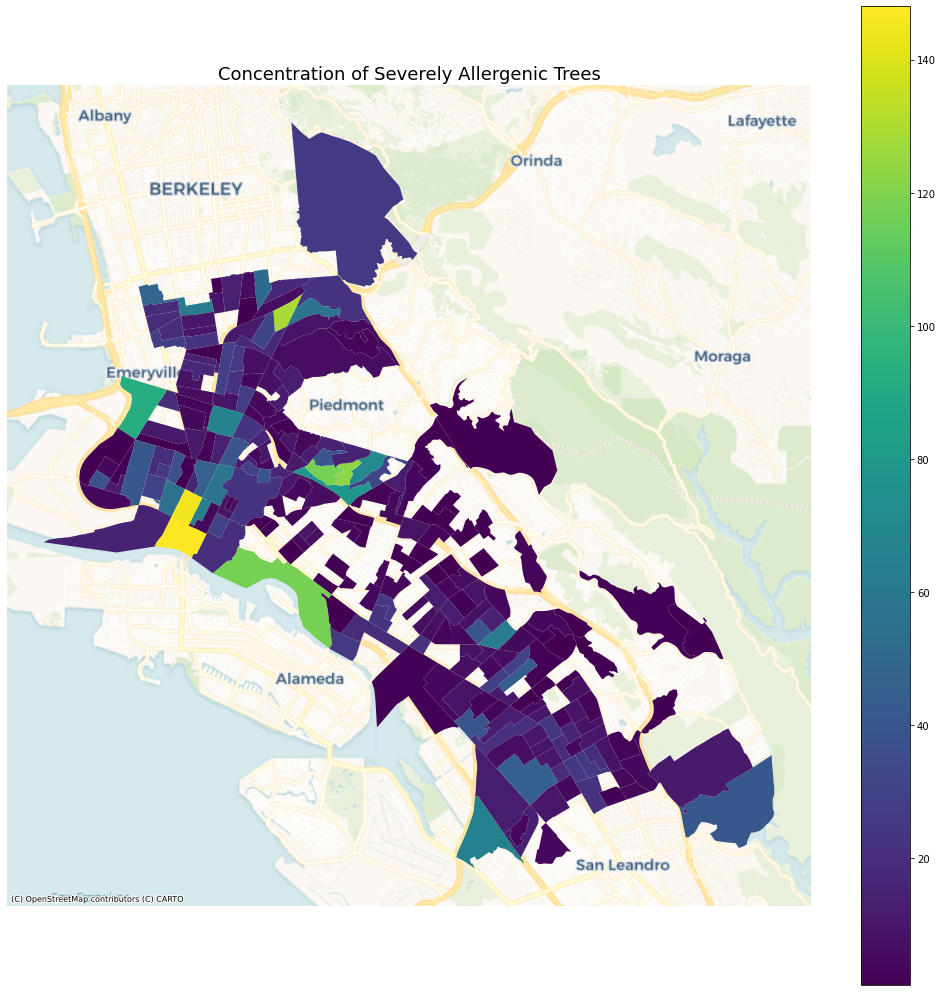

In [58]:
fig,ax = plt.subplots(figsize=(18,18))

oakt_educ_allergytree_mercator.plot(ax=ax,column='tree count',legend=True,cmap='viridis')

ax.set_title('Concentration of Severely Allergenic Trees', fontsize=18)
ax.axis('off')

ctx.add_basemap(ax, crs=oakt_educ_allergytree_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

In [22]:
oakt_race_deadtree_mercator = oakt_race_deadtree.to_crs(epsg=3857)
oakt_educ_deadtree_mercator = oakt_educ_deadtree.to_crs(epsg=3857)
oakt_income_deadtree_mercator = oakt_income_deadtree.to_crs(epsg=3857)

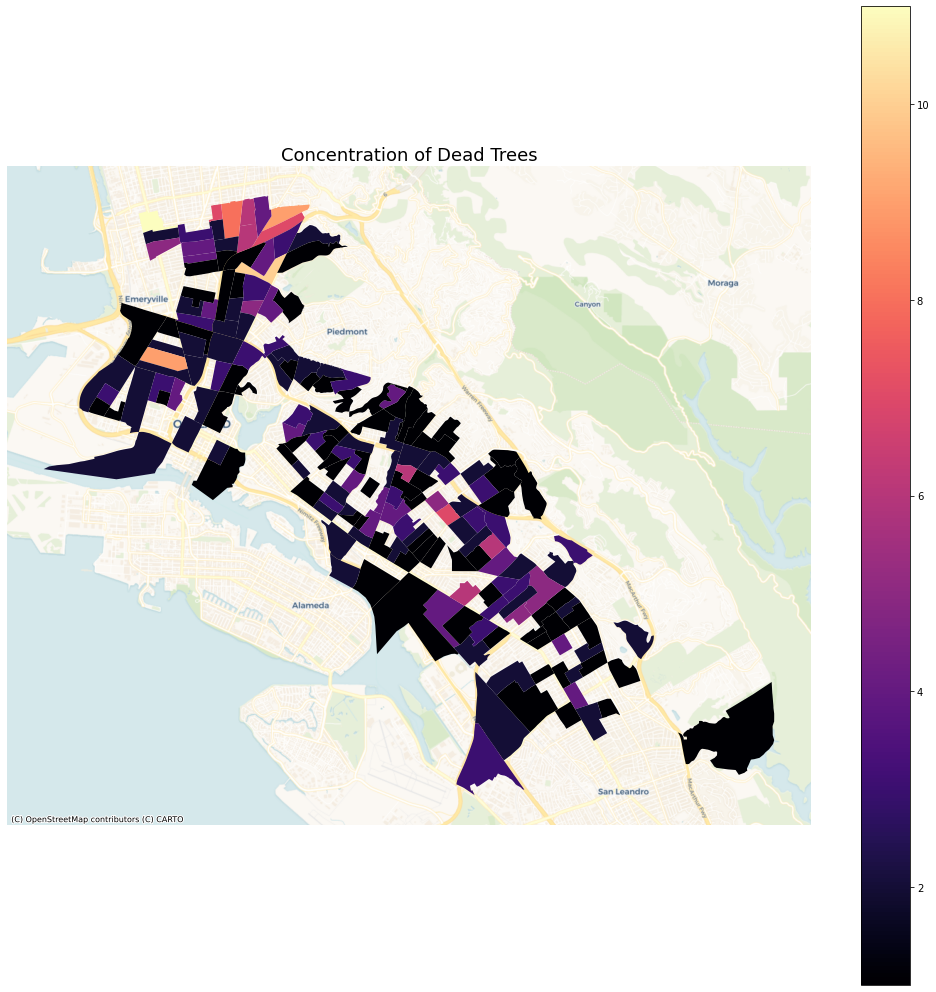

In [59]:
fig,ax = plt.subplots(figsize=(18,18))

oakt_income_deadtree_mercator.plot(ax=ax,column='tree count',legend=True,cmap='magma')

ax.set_title('Concentration of Dead Trees', fontsize=18)
ax.axis('off')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## dropping null values

### Dropping null values to prep for my scatter plots

In [24]:
oak_race_allergytree=oakt_race_allergytree.dropna(subset=['tree count'])
oak_income_allergytree=oakt_income_allergytree.dropna(subset=['tree count'])
oak_educ_allergytree=oakt_educ_allergytree.dropna(subset=['tree count'])

oak_race_deadtree=oakt_race_deadtree.dropna(subset=['tree count'])
oak_income_deadtree=oakt_income_deadtree.dropna(subset=['tree count'])
oak_educ_deadtree=oakt_educ_deadtree.dropna(subset=['tree count'])


In [50]:
oak_race_allergytree.sample(10)

geoid                        name   Total  \
20   15000US060014008002  Block Group 2, Alameda, CA  1131.0   
262  15000US060014084003  Block Group 3, Alameda, CA   995.0   
290  15000US060014092001  Block Group 1, Alameda, CA  2017.0   
218  15000US060014071024  Block Group 4, Alameda, CA   791.0   
79   15000US060014035022  Block Group 2, Alameda, CA  1301.0   
123  15000US060014049002  Block Group 2, Alameda, CA  1279.0   
92   15000US060014039002  Block Group 2, Alameda, CA   832.0   
101  15000US060014042002  Block Group 2, Alameda, CA  1479.0   
286  15000US060014090003  Block Group 3, Alameda, CA  2197.0   
335  15000US060019832001  Block Group 1, Alameda, CA   583.0   

     Not Hispanic or Latino  White alone  Black or African American alone  \
20                    937.0        366.0                            436.0   
262                   806.0         84.0                            721.0   
290                  1067.0         48.0                            815.0   
218                   448.0         34.0                            130.0   
79                   1209.0        499.0                            416.0   
123                  1036.0        402.0                            255.0   
92                    774.0        615.0                             69.0   
101                  1376.0        931.0                             91.0   
286                   848.0         43.0                            699.0   
335                   536.0        308.0                             53.0   

     American Indian and Alaska Native alone  Asian alone  \
20                                       0.0         79.0   
262                                      0.0          0.0   
290                                      0.0        134.0   
218                                     10.0        188.0   
79                                       0.0        137.0   
123                                     11.0        245.0   
92                                       0.0         46.0   
101                                      5.0        285.0   
286                                      0.0         65.0   
335                                      9.0        138.0   

     Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
20                                                0.0                    0.0   
262                                               0.0                    0.0   
290                                               0.0                    0.0   
218                                               0.0                    0.0   
79                                                0.0                    0.0   
123                                               0.0                    0.0   
92                                                0.0                    0.0   
101                                               0.0                    0.0   
286                                               6.0                    0.0   
335                                               3.0                    5.0   

     Two or more races  Hispanic or Latino  \
20                56.0               194.0   
262                1.0               189.0   
290               70.0               950.0   
218               86.0               343.0   
79               157.0                92.0   
123              123.0               243.0   
92                44.0                58.0   
101               64.0               103.0   
286               35.0              1349.0   
335               20.0                47.0   

                                              geometry  Percent Non Hispanic  \
20   MULTIPOLYGON (((-122.28750 37.84577, -122.2871...             82.847038   
262  MULTIPOLYGON (((-122.17276 37.76214, -122.1727...             81.005025   
290  MULTIPOLYGON (((-122.18023 37.72574, -122.1802...             52.900347   
218  MULTIPOLYGON (((-122.21386 37.77652, -122.2135...             56.637168   
79   M

In [51]:
oak_income_allergytree.sample(10)

geoid                        name   Total  \
125  15000US060014049004  Block Group 4, Alameda, CA   534.0   
67   15000US060014030002  Block Group 2, Alameda, CA   546.0   
288  15000US060014091001  Block Group 1, Alameda, CA   416.0   
223  15000US060014073001  Block Group 1, Alameda, CA   379.0   
304  15000US060014096003  Block Group 3, Alameda, CA   286.0   
328  15000US060014103003  Block Group 3, Alameda, CA   449.0   
75   15000US060014035011  Block Group 1, Alameda, CA  1253.0   
319  15000US060014100002  Block Group 2, Alameda, CA   812.0   
104  15000US060014043002  Block Group 2, Alameda, CA   411.0   
136  15000US060014052003  Block Group 3, Alameda, CA   518.0   

     Less than $10,000  $10,000 to $14,999  $15,000 to $19,999  \
125                0.0                 0.0                 0.0   
67                75.0               135.0               115.0   
288               22.0                13.0                35.0   
223               20.0                61.0                31.0   
304               12.0                35.0                 0.0   
328               27.0                24.0                35.0   
75                75.0               207.0               129.0   
319               12.0                60.0                 0.0   
104                9.0                 0.0                 0.0   
136                0.0                43.0                29.0   

     $20,000 to $24,999  $25,000 to $29,999  $30,000 to $34,999  \
125                 0.0                 0.0                 0.0   
67                 49.0                44.0                 0.0   
288                12.0                15.0                34.0   
223                 9.0                22.0                10.0   
304                19.0                 0.0                18.0   
328                28.0                12.0                12.0   
75                 69.0               136.0                18.0   
319                38.0                 0.0                46.0   
104                 0.0                 0.0                 9.0   
136                18.0                 0.0                 0.0   

     $35,000 to $39,999  $40,000 to $44,999  $45,000 to $49,999  \
125                12.0                 0.0                 5.0   
67                 44.0                 0.0                 7.0   
288                31.0                14.0                24.0   
223                19.0                20.0                 0.0   
304                 0.0                 0.0                 0.0   
328                42.0                 9.0                18.0   
75                  0.0                16.0                 0.0   
319                40.0                22.0                 8.0   
104                 0.0                 0.0                36.0   
136                 0.0                 0.0                 0.0   

     $50,000 to $59,999  $60,000 to $74,999  $75,000 to $99,999  \
125                 0.0                51.0                25.0   
67                  8.0                16.0                 0.0   
288                 9.0                55.0                71.0   
223                16.0                28.0                12.0   
304                61.0                23.0                70.0   
328                74.0                30.0                77.0   
75                 83.0               100.0                51.0   
319                83.0                55.0                54.0   
104                11.0                20.0                21.0   
136                21.0                33.0                66.0   

     $100,000 to $124,999  $125,000 to $149,999  $150,000 to $199,999  \
125                  73.0                  95.0                  93.0   
67                    9.0                   3.0                  33.0   
288                  62.0                   0.0                   4.0   
223                  79.0                  26.0                   0.0   
304     

In [52]:
oak_educ_allergytree.sample(10)

geoid                        name   Total   GED  \
145  15000US060014054021  Block Group 1, Alameda, CA  1452.0   0.0   
1    15000US060014002001  Block Group 1, Alameda, CA   743.0   0.0   
84   15000US060014037012  Block Group 2, Alameda, CA  1402.0  16.0   
29   15000US060014010006  Block Group 6, Alameda, CA   475.0   0.0   
242  15000US060014078003  Block Group 3, Alameda, CA   683.0  18.0   
48   15000US060014017001  Block Group 1, Alameda, CA   764.0   9.0   
269  15000US060014086002  Block Group 2, Alameda, CA  1611.0   7.0   
75   15000US060014035011  Block Group 1, Alameda, CA  1653.0   0.0   
74   15000US060014034004  Block Group 4, Alameda, CA   940.0  40.0   
70   15000US060014033002  Block Group 2, Alameda, CA  1911.0   0.0   

     Associates  Bachelor  Master  Professional school  Doctorate  \
145       117.0     278.0    89.0                 10.0        0.0   
1          17.0     253.0   253.0                110.0       76.0   
84         19.0     630.0   276.0                 60.0       35.0   
29         30.0     166.0   102.0                  0.0       27.0   
242        34.0     215.0   111.0                  0.0        8.0   
48         66.0     310.0    77.0                 17.0       23.0   
269        40.0     299.0    56.0                 19.0       10.0   
75        114.0     558.0   135.0                119.0       46.0   
74         52.0     320.0   183.0                 63.0       14.0   
70        131.0     239.0    39.0                  0.0       21.0   

                                              geometry  High school or less  \
145  MULTIPOLYGON (((-122.25051 37.79283, -122.2503...                690.0   
1    MULTIPOLYGON (((-122.25508 37.84607, -122.2542...                 12.0   
84   MULTIPOLYGON (((-122.26057 37.81125, -122.2603...                199.0   
29   MULTIPOLYGON (((-122.27846 37.82886, -122.2783...                 15.0   
242  MULTIPOLYGON (((-122.19997 37.78465, -122.1995...                221.0   
48   MULTIPOLYGON (((-122.29438 37.81949, -122.2937...                 72.0   
269  MULTIPOLYGON (((-122.19017 37.76375, -122.1899...                888.0   
75   MULTIPOLYGON (((-122.26677 37.81155, -122.2663...                391.0   
74   MULTIPOLYGON (((-122.26515 37.80219, -122.2648...                 48.0   
70   MULTIPOLYGON (((-122.26980 37.79708, -122.2697...               1103.0   

     Some college  Percent GED  Percent Associates  Percent Bachelor  \
145         268.0     0.000000            8.057851         19.146006   
1            22.0     0.000000            2.288022         34.051144   
84          167.0     1.141227            1.355207         44.935806   
29          135.0     0.000000            6.315789         34.947368   
242          76.0     2.635432            4.978038         31.478770   
48          190.0     1.178010            8.638743         40.575916   
269         292.0     0.434513            2.482930         18.559901   
75          290.0     0.000000            6.896552         33.756806   
74          220.0     4.255319            5.531915         34.042553   
70          378.0     0.000000            6.855050         12.506541   

     Percent Master  Percent Professional school  Percent Doctorate  \
145        6.129477                     0.688705           0.000000   
1         34.051144                    14.804845          10.228802   
84        19.686163                     4.279601           2.496434   
29        21.473684                     0.000000           5.684211   
242       16.251830                     0.000000           1.171303   
48        10.078534                     2.225131           3.010471   
269        3.476102                     1.179392           0.620732   
75         8.166969                     7.199032           2.782819   
74        19.468085                     6.702128           1.489362   
70         2.040816                     0.000000           1.098901   

     Percent High school or less  Percent S

In [53]:
oak_race_deadtree.sample(10)

geoid                        name   Total  \
334  15000US060019820001  Block Group 1, Alameda, CA    63.0   
56   15000US060014024001  Block Group 1, Alameda, CA  1761.0   
189  15000US060014065004  Block Group 4, Alameda, CA  1518.0   
14   15000US060014006002  Block Group 2, Alameda, CA   660.0   
318  15000US060014100001  Block Group 1, Alameda, CA   985.0   
229  15000US060014075002  Block Group 2, Alameda, CA  2444.0   
245  15000US060014079003  Block Group 3, Alameda, CA  1209.0   
331  15000US060014104003  Block Group 3, Alameda, CA  1787.0   
146  15000US060014054022  Block Group 2, Alameda, CA  1382.0   
32   15000US060014011003  Block Group 3, Alameda, CA   958.0   

     Not Hispanic or Latino  White alone  Black or African American alone  \
334                    55.0         10.0                             23.0   
56                   1554.0        502.0                            826.0   
189                   972.0        255.0                            308.0   
14                    612.0        416.0                            110.0   
318                   863.0        431.0                            104.0   
229                   735.0         70.0                            500.0   
245                  1167.0        591.0                            226.0   
331                   967.0        230.0                            401.0   
146                  1150.0        466.0                            462.0   
32                    838.0        306.0                             41.0   

     American Indian and Alaska Native alone  Asian alone  \
334                                      2.0         20.0   
56                                       0.0        153.0   
189                                      0.0        305.0   
14                                       0.0         51.0   
318                                      0.0        114.0   
229                                      0.0        113.0   
245                                      0.0        251.0   
331                                      0.0        286.0   
146                                      0.0         58.0   
32                                       0.0        428.0   

     Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
334                                               0.0                    0.0   
56                                                0.0                    0.0   
189                                               0.0                    0.0   
14                                                0.0                    5.0   
318                                              29.0                   12.0   
229                                               0.0                    0.0   
245                                               2.0                   53.0   
331                                               0.0                    0.0   
146                                              47.0                    0.0   
32                                                0.0                   19.0   

     Two or more races  Hispanic or Latino  \
334                0.0                 8.0   
56                73.0               207.0   
189              104.0               546.0   
14                30.0                48.0   
318              173.0               122.0   
229               52.0              1709.0   
245               44.0                42.0   
331               50.0               820.0   
146              117.0               232.0   
32                44.0               120.0   

                                              geometry  Percent Non Hispanic  \
334  MULTIPOLYGON (((-122.31439 37.79484, -122.3135...             87.301587   
56   MULTIPOLYGON (((-122.28621 37.80961, -122.2861...             88.245315   
189  MULTIPOLYGON (((-122.22118 37.78762, -122.2211...             64.031621   
14   MULTIPOLYGON (((-122.26756 37.84167, -122.2670...             92.727273   
318  M

In [54]:
oak_income_deadtree.sample(10)

geoid                        name  Total  \
32   15000US060014011003  Block Group 3, Alameda, CA  362.0   
122  15000US060014049001  Block Group 1, Alameda, CA  326.0   
242  15000US060014078003  Block Group 3, Alameda, CA  352.0   
41   15000US060014014002  Block Group 2, Alameda, CA  685.0   
260  15000US060014084001  Block Group 1, Alameda, CA  459.0   
186  15000US060014065001  Block Group 1, Alameda, CA  730.0   
135  15000US060014052002  Block Group 2, Alameda, CA  534.0   
104  15000US060014043002  Block Group 2, Alameda, CA  411.0   
276  15000US060014087005  Block Group 5, Alameda, CA  324.0   
189  15000US060014065004  Block Group 4, Alameda, CA  505.0   

     Less than $10,000  $10,000 to $14,999  $15,000 to $19,999  \
32                51.0                 0.0                16.0   
122                0.0                 0.0                 8.0   
242               53.0                10.0                 5.0   
41                51.0                43.0                29.0   
260               55.0                67.0                12.0   
186               54.0                20.0                49.0   
135                0.0                47.0                35.0   
104                9.0                 0.0                 0.0   
276               50.0                 0.0                 0.0   
189               71.0                 9.0                16.0   

     $20,000 to $24,999  $25,000 to $29,999  $30,000 to $34,999  \
32                  0.0                18.0                14.0   
122                10.0                 0.0                 0.0   
242                13.0                 0.0                 4.0   
41                 35.0                13.0                64.0   
260                11.0                39.0                24.0   
186                38.0                 0.0                57.0   
135                20.0                68.0                57.0   
104                 0.0                 0.0                 9.0   
276                18.0                34.0                21.0   
189                63.0                20.0                50.0   

     $35,000 to $39,999  $40,000 to $44,999  $45,000 to $49,999  \
32                  0.0                 0.0                 0.0   
122                 9.0                 0.0                 0.0   
242                 0.0                12.0                 0.0   
41                  0.0                43.0                59.0   
260                 8.0                23.0                39.0   
186                43.0                29.0                36.0   
135                25.0                 0.0                 0.0   
104                 0.0                 0.0                36.0   
276                 0.0                 0.0                51.0   
189                26.0                 0.0                 7.0   

     $50,000 to $59,999  $60,000 to $74,999  $75,000 to $99,999  \
32                 29.0                 0.0                12.0   
122                 0.0                54.0                59.0   
242                28.0                22.0                49.0   
41                 45.0                19.0                93.0   
260                36.0                32.0                49.0   
186                18.0                82.0               116.0   
135                16.0                12.0               101.0   
104                11.0                20.0                21.0   
276                 0.0                 0.0                91.0   
189                29.0                68.0                50.0   

     $100,000 to $124,999  $125,000 to $149,999  $150,000 to $199,999  \
32                   14.0                  54.0                  68.0   
122                   7.0                  43.0                  36.0   
242                  50.0                  27.0                  33.0   
41                   98.0                   7.0                  24.0   
260                

In [55]:
oak_educ_deadtree.sample(10)

geoid                        name   Total   GED  \
172  15000US060014061004  Block Group 4, Alameda, CA  1092.0   0.0   
286  15000US060014090003  Block Group 3, Alameda, CA  1301.0  83.0   
219  15000US060014072001  Block Group 1, Alameda, CA  1299.0  14.0   
222  15000US060014072004  Block Group 4, Alameda, CA  1381.0  14.0   
245  15000US060014079003  Block Group 3, Alameda, CA   884.0  37.0   
265  15000US060014085003  Block Group 3, Alameda, CA   414.0  16.0   
268  15000US060014086001  Block Group 1, Alameda, CA  1080.0  18.0   
11   15000US060014005002  Block Group 2, Alameda, CA   690.0   0.0   
104  15000US060014043002  Block Group 2, Alameda, CA   826.0   0.0   
21   15000US060014008003  Block Group 3, Alameda, CA  1208.0   0.0   

     Associates  Bachelor  Master  Professional school  Doctorate  \
172         0.0     166.0    34.0                  0.0        0.0   
286        64.0     238.0    59.0                 10.0        0.0   
219        39.0     235.0    30.0                  0.0       20.0   
222        48.0     324.0   107.0                  4.0        4.0   
245        27.0     300.0   236.0                 34.0       50.0   
265        37.0      19.0     0.0                 15.0        0.0   
268        69.0      70.0   108.0                  0.0        0.0   
11         24.0     120.0   104.0                 36.0       53.0   
104        17.0     263.0   151.0                179.0       91.0   
21        100.0     445.0   150.0                 33.0       58.0   

                                              geometry  High school or less  \
172  MULTIPOLYGON (((-122.23872 37.78359, -122.2386...                656.0   
286  MULTIPOLYGON (((-122.20166 37.72694, -122.2016...                669.0   
219  MULTIPOLYGON (((-122.21894 37.77435, -122.2186...                741.0   
222  MULTIPOLYGON (((-122.22575 37.77774, -122.2256...                752.0   
245  MULTIPOLYGON (((-122.19572 37.78686, -122.1955...                 48.0   
265  MULTIPOLYGON (((-122.18245 37.75706, -122.1815...                280.0   
268  MULTIPOLYGON (((-122.18310 37.76531, -122.1824...                394.0   
11   MULTIPOLYGON (((-122.26941 37.84811, -122.2689...                279.0   
104  MULTIPOLYGON (((-122.24813 37.84139, -122.2474...                 81.0   
21   MULTIPOLYGON (((-122.28671 37.84334, -122.2865...                271.0   

     Some college  Percent GED  Percent Associates  Percent Bachelor  \
172         236.0     0.000000            0.000000         15.201465   
286         178.0     6.379708            4.919293         18.293620   
219         220.0     1.077752            3.002309         18.090839   
222         128.0     1.013758            3.475742         23.461260   
245         152.0     4.185520            3.054299         33.936652   
265          47.0     3.864734            8.937198          4.589372   
268         421.0     1.666667            6.388889          6.481481   
11           74.0     0.000000            3.478261         17.391304   
104          44.0     0.000000            2.058111         31.840194   
21          151.0     0.000000            8.278146         36.837748   

     Percent Master  Percent Professional school  Percent Doctorate  \
172        3.113553                     0.000000           0.000000   
286        4.534973                     0.768640           0.000000   
219        2.309469                     0.000000           1.539646   
222        7.748009                     0.289645           0.289645   
245       26.696833                     3.846154           5.656109   
265        0.000000                     3.623188           0.000000   
268       10.000000                     0.000000           0.000000   
11        15.072464                     5.217391           7.681159   
104       18.280872                    21.670702          11.016949   
21        12.417219                     2.731788           4.801325   

     Percent High school or less  Percent S

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## creating scatter plots

### Below I've created scatterplots for both the list of Allergenic Trees and Dead Trees, crossed with Race data and Educational Attainment data from the ACS

In [25]:
oak_race_corr=oak_race_allergytree.dropna(subset=['Percent Hispanic/Latino'])
np.corrcoef(oak_race_corr['Percent Hispanic/Latino'], oak_race_corr['tree count'])

array([[ 1.        , -0.13571787],
       [-0.13571787,  1.        ]])

Text(0, 0.5, 'Percent Hispanic/Latino')

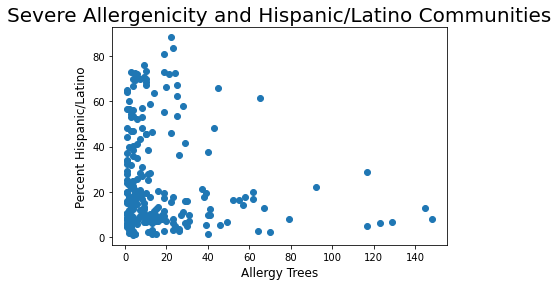

In [26]:
x=oak_race_corr['tree count']
y=oak_race_corr['Percent Hispanic/Latino'] 


plt.plot(x,y,'o')
plt.title(label="Severe Allergenicity and Hispanic/Latino Communities",
          fontsize=20,
          color="black",)
plt.xlabel('Allergy Trees', fontsize=12)
plt.ylabel('Percent Hispanic/Latino', fontsize=12)

In [27]:
oak_race_corr=oak_race_allergytree.dropna(subset=['Percent Black'])
np.corrcoef(oak_race_corr['Percent Black'], oak_race_corr['tree count'])

array([[ 1.        , -0.15404895],
       [-0.15404895,  1.        ]])

Text(0, 0.5, 'Percent Black')

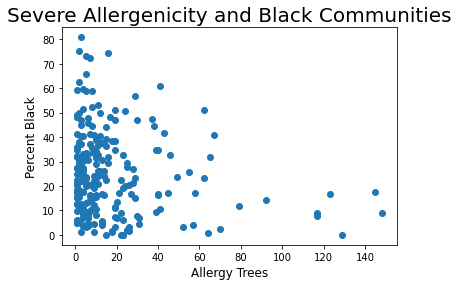

In [28]:
x=oak_race_corr['tree count']
y=oak_race_corr['Percent Black'] 


plt.plot(x,y,'o')
plt.title(label="Severe Allergenicity and Black Communities",
          fontsize=20,
          color="black",)
plt.xlabel('Allergy Trees', fontsize=12)
plt.ylabel('Percent Black', fontsize=12)

In [29]:
oak_race_corr=oak_race_allergytree.dropna(subset=['Percent White'])
np.corrcoef(oak_race_corr['Percent White'], oak_race_corr['tree count'])

array([[1.        , 0.22264266],
       [0.22264266, 1.        ]])

Text(0, 0.5, 'Percent White')

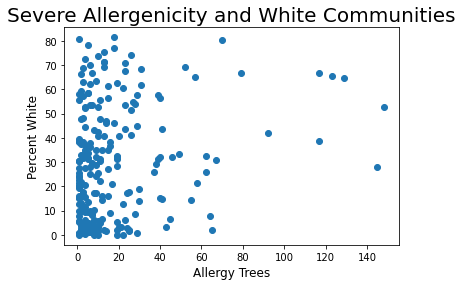

In [30]:
x=oak_race_corr['tree count']
y=oak_race_corr['Percent White'] 


plt.plot(x,y,'o')
plt.title(label="Severe Allergenicity and White Communities",
          fontsize=20,
          color="black",)
plt.xlabel('Allergy Trees', fontsize=12)
plt.ylabel('Percent White', fontsize=12)

In [31]:
oak_educ_corr=oak_educ_allergytree.dropna(subset=['Percent High school or less'])
np.corrcoef(oak_educ_corr['Percent High school or less'], oak_educ_corr['tree count'])

array([[ 1.        , -0.16679435],
       [-0.16679435,  1.        ]])

Text(0, 0.5, 'Percent High school or less')

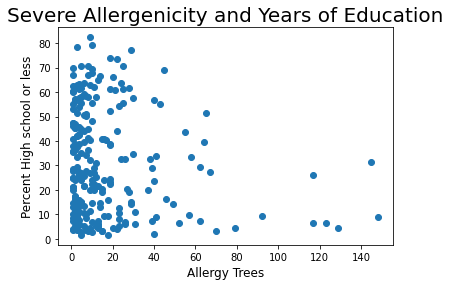

In [32]:
x=oak_educ_corr['tree count']
y=oak_educ_corr['Percent High school or less'] 


plt.plot(x,y,'o')
plt.title(label="Severe Allergenicity and Years of Education",
          fontsize=20,
          color="black",)
plt.xlabel('Allergy Trees', fontsize=12)
plt.ylabel('Percent High school or less', fontsize=12)

In [33]:
oak_race_corr_dead=oak_race_deadtree.dropna(subset=['Percent Hispanic/Latino'])
np.corrcoef(oak_race_corr_dead['Percent Hispanic/Latino'], oak_race_corr_dead['tree count'])

array([[ 1.        , -0.07787594],
       [-0.07787594,  1.        ]])

Text(0, 0.5, 'Percent Hispanic/Latino')

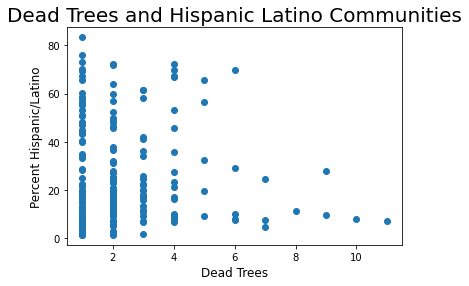

In [34]:
x=oak_race_corr_dead['tree count']
y=oak_race_corr_dead['Percent Hispanic/Latino'] 


plt.plot(x,y,'o')
plt.title(label="Dead Trees and Hispanic Latino Communities",
          fontsize=20,
          color="black",)
plt.xlabel('Dead Trees', fontsize=12)
plt.ylabel('Percent Hispanic/Latino', fontsize=12)

In [35]:
oak_race_corr_dead=oak_race_deadtree.dropna(subset=['Percent Black'])
np.corrcoef(oak_race_corr_dead['Percent Black'], oak_race_corr_dead['tree count'])

array([[ 1.        , -0.06998411],
       [-0.06998411,  1.        ]])

Text(0, 0.5, 'Percent Black')

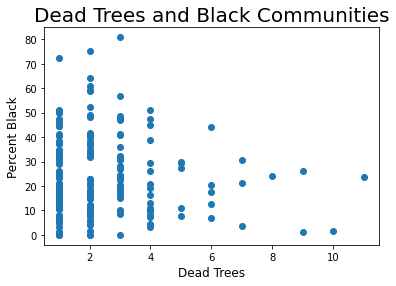

In [36]:
x=oak_race_corr_dead['tree count']
y=oak_race_corr_dead['Percent Black'] 


plt.plot(x,y,'o')
plt.title(label="Dead Trees and Black Communities",
          fontsize=20,
          color="black",)
plt.xlabel('Dead Trees', fontsize=12)
plt.ylabel('Percent Black', fontsize=12)

In [37]:
oak_race_corr_dead=oak_race_deadtree.dropna(subset=['Percent White'])
np.corrcoef(oak_race_corr_dead['Percent White'], oak_race_corr_dead['tree count'])

array([[1.        , 0.15647369],
       [0.15647369, 1.        ]])

Text(0, 0.5, 'Percent White')

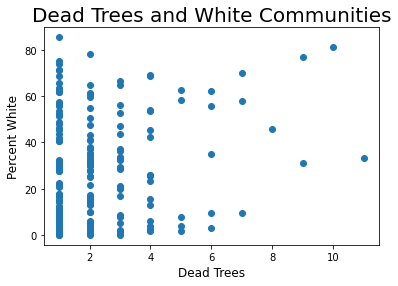

In [38]:
x=oak_race_corr_dead['tree count']
y=oak_race_corr_dead['Percent White'] 


plt.plot(x,y,'o')
plt.title(label="Dead Trees and White Communities",
          fontsize=20,
          color="black",)
plt.xlabel('Dead Trees', fontsize=12)
plt.ylabel('Percent White', fontsize=12)

In [39]:
oak_educ_corr_dead=oak_educ_deadtree.dropna(subset=['Percent High school or less'])
np.corrcoef(oak_educ_corr_dead['Percent High school or less'], oak_educ_corr_dead['tree count'])

array([[ 1.        , -0.13511693],
       [-0.13511693,  1.        ]])

Text(0, 0.5, 'Percent High school or less')

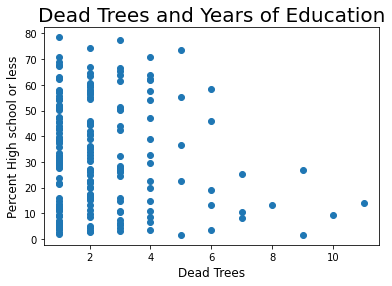

In [40]:
x=oak_educ_corr_dead['tree count']
y=oak_educ_corr_dead['Percent High school or less'] 


plt.plot(x,y,'o')
plt.title(label="Dead Trees and Years of Education",
          fontsize=20,
          color="black",)
plt.xlabel('Dead Trees', fontsize=12)
plt.ylabel('Percent High school or less', fontsize=12)